# Solucion de la ecuacion de adveccion

La ecuación de advección es el caso de partida para el estudio de ecuaciones en derivadas parciales hiperbólicas.

In [1]:
# Autor: Jose M Torres
# Adveccion

# Este programa resuelve la ecuacion de adveccion en una dimension
# usando un metodo de diferencias finitas

# El dato inicial es un pulso gaussiano

# El resultado es un archivo a dos columnas donde se guardan las posiciones en la malla 
# y el valor correspondiente de la función de onda a intervalos regulares de tiempo.
# Cada instante de salida esta separado por dos saltos de linea.

import numpy as np
import math

In [2]:
# Parametros

N = 2000          # Numero de puntos de la malla
dx = 0.05         # Intervalo espacial
courant = 0.5     # Parametro de courant dt/dx
dt = courant*dx   # Paso de tiempo
Nt = 1500         # Total de iteraciones
fout = 20         # Frecuencia de salida

x0 = 0.5*N*dx     # Localizacion del pulso gaussiano
sig= 10.           # Ancho del pulso
A = 1.0           # Amplitud del pulso

outfile=open('phi_num.xl','w') # Nombre del archivo de salida

In [3]:
# Definición de arreglos e inicialización
x = np.linspace(0,(N-1)*dx,N)        # Posiciones en la malla
phi = np.zeros(N)                    # Función de onda
phi_p = np.zeros(N)                  # Función de onda en el paso anterior
phi_s = np.zeros(N)                  # "Fuente" de la ecuación de evolución

for i in range(N):
    phi[i]=A*math.exp( - ( (x[i]-x0) /sig)**2)


In [4]:
# Guardar dato inicial en un archivo de dos columnas: x   phi(x)
outfile.write('#t=0.0\n')   # Comentario al estilo gnuplot
for i in range(N):
    outfile.write(str(x[i])+' '+str(phi[i])+'\n')
outfile.write('\n\n')


2

In [5]:

# Ciclo de evolución
for i in range(1,Nt+1):
    phi_p[:]=phi       # De este modo se copian los valores de la función de onda

    # Ciclo de puntos internos del dominio
    for j in range(1,N-1):
        phi_s[j] = (-(phi_p[j+1]-phi_p[j-1])*0.5          # Contribución del método de Euler
		 +0.5*courant*(phi_p[j+1]-2.*phi_p[j]+phi_p[j-1]) # Corrección Lax-Wendroff
		 )
        phi[j] = phi_p[j] + courant*phi_s[j]              # Actualización de los valores de la función de onda
    
    
    # Frontera derecha a primer orden
    phi[N-1] = phi_p[N-1] - courant*(phi_p[N-1]-phi_p[N-2]) 
    
    # Guardar datos de salida
    if not i%fout :
        outfile.write('#t='+str(i*dt)+'\n')
        for j in range(0,N):
            outfile.write(str(x[j])+' '+str(phi[j])+'\n')
        outfile.write('\n\n')


In [6]:
outfile.close()
print 'Listo!'

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-6-1b1843c08b14>, line 2)

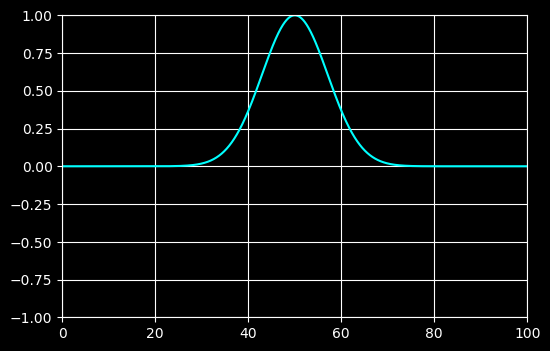

In [7]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.style.use('dark_background')

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)


output = np.loadtxt('phi_num.xl')
steps = Nt/fout

k=0

def animate(i):
    global k
    fx = output[N*k:N*(k+1)-1,1]
    x = output[N*k:N*(k+1)-1,0]
    k += 1
    ax1.clear()
    plt.plot(x,fx,color='cyan')
    plt.grid(True)
    plt.ylim([-1,1])
    plt.xlim([0,N*dx])

anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()


